In [1]:
wbcd <- read.csv("wisc_bc_data.csv", stringsAsFactors = FALSE)

In [3]:
wbcd <- wbcd[-1]

In [4]:
head(wbcd, 3)

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,points_mean,symmetry_mean,⋯,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,points_worst,symmetry_worst,dimension_worst
,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,B,12.32,12.39,78.85,464.1,0.10280,0.06981,0.03987,0.03700,0.1959,⋯,13.50,15.64,86.97,549.1,0.1385,0.1266,0.1242,0.09391,0.2827,0.06771
2,B,10.60,18.95,69.28,346.4,0.09688,0.11470,0.06387,0.02642,0.1922,⋯,11.88,22.94,78.28,424.8,0.1213,0.2515,0.1916,0.07926,0.2940,0.07587
3,B,11.04,16.83,70.92,373.2,0.10770,0.07804,0.03046,0.02480,0.1714,⋯,12.41,26.44,79.93,471.4,0.1369,0.1482,0.1067,0.07431,0.2998,0.07881


In [5]:
table(wbcd$diagnosis)
round(proportions(table(wbcd$diagnosis)) * 100, digits = 1)

# Older version of 'proportions' is 'prop.table'
round(prop.table(table(wbcd$diagnosis)) * 100, digits = 1)


  B   M 
357 212 


   B    M 
62.7 37.3 


   B    M 
62.7 37.3 

In [6]:
wbcd$diagnosis <- factor(wbcd$diagnosis, levels = c("B", "M"), labels = c("Benign", "Malignant"))

In [7]:
head(wbcd, 3)

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,points_mean,symmetry_mean,⋯,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,points_worst,symmetry_worst,dimension_worst
,<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,Benign,12.32,12.39,78.85,464.1,0.10280,0.06981,0.03987,0.03700,0.1959,⋯,13.50,15.64,86.97,549.1,0.1385,0.1266,0.1242,0.09391,0.2827,0.06771
2,Benign,10.60,18.95,69.28,346.4,0.09688,0.11470,0.06387,0.02642,0.1922,⋯,11.88,22.94,78.28,424.8,0.1213,0.2515,0.1916,0.07926,0.2940,0.07587
3,Benign,11.04,16.83,70.92,373.2,0.10770,0.07804,0.03046,0.02480,0.1714,⋯,12.41,26.44,79.93,471.4,0.1369,0.1482,0.1067,0.07431,0.2998,0.07881


In [8]:
library(psych)

In [11]:
normalize <- function(x) {
        return ((x - min(x))/(max(x) - min(x)))
}

In [13]:
normalize(c(1, 2, 3, 4, 5))
normalize(c(10, 20, 30, 40, 50))

[1] 0.00 0.25 0.50 0.75 1.00

[1] 0.00 0.25 0.50 0.75 1.00

In [14]:
wbcd_n <- as.data.frame(lapply(wbcd[2:31], normalize))

In [15]:
summary(wbcd_n[2:5])

  texture_mean    perimeter_mean     area_mean      smoothness_mean 
 Min.   :0.0000   Min.   :0.0000   Min.   :0.0000   Min.   :0.0000  
 1st Qu.:0.2185   1st Qu.:0.2168   1st Qu.:0.1174   1st Qu.:0.3046  
 Median :0.3088   Median :0.2933   Median :0.1729   Median :0.3904  
 Mean   :0.3240   Mean   :0.3329   Mean   :0.2169   Mean   :0.3948  
 3rd Qu.:0.4089   3rd Qu.:0.4168   3rd Qu.:0.2711   3rd Qu.:0.4755  
 Max.   :1.0000   Max.   :1.0000   Max.   :1.0000   Max.   :1.0000  

In [16]:
head(wbcd_n, 10)

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,points_mean,symmetry_mean,dimension_mean,⋯,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,points_worst,symmetry_worst,dimension_worst
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,0.2526859,0.0906324,0.2422777,0.13599152,0.4529205,0.1546838,0.09341612,0.18389662,0.4540404,0.2019798,⋯,0.1981501,0.09648188,0.1820808,0.08943669,0.4446279,0.09635106,0.09920128,0.3227148,0.2487680,0.08310376
2,0.1712812,0.3124789,0.1761454,0.08606575,0.3994764,0.2923747,0.14964855,0.13131213,0.4353535,0.3148694,⋯,0.1405194,0.29104478,0.1388017,0.05888714,0.3310440,0.21752966,0.15303514,0.2723711,0.2710428,0.13662600
3,0.1921056,0.2407846,0.1874784,0.09743372,0.4971563,0.1799276,0.07136832,0.12326044,0.3303030,0.2830666,⋯,0.1593739,0.38432836,0.1470193,0.07034015,0.4340619,0.11730749,0.08522364,0.2553608,0.2824759,0.15590975
4,0.2034644,0.1244505,0.2018520,0.10235419,0.5756974,0.2890007,0.10859888,0.23836978,0.3590909,0.2266217,⋯,0.1419424,0.09994670,0.1300862,0.06114825,0.4327412,0.15029446,0.06924121,0.2959107,0.1058545,0.08395645
5,0.3885182,0.1183632,0.3721927,0.24106045,0.2437483,0.1532421,0.07949859,0.13205765,0.3338384,0.1154170,⋯,0.2942014,0.09888060,0.2693859,0.15579532,0.2735918,0.14204771,0.10878594,0.2810309,0.1817465,0.08277581
6,0.2171896,0.3155225,0.2101444,0.11291622,0.2963799,0.1774124,0.12851453,0.07097416,0.4904040,0.2676917,⋯,0.1828531,0.39872068,0.1793914,0.08240759,0.3548174,0.16145181,0.20447284,0.2290034,0.2897694,0.18234291
7,0.2143499,0.4808928,0.2123557,0.11028632,0.3609280,0.2537268,0.26054358,0.20402584,0.1656566,0.3315080,⋯,0.1618641,0.67004264,0.1587230,0.07102831,0.3871756,0.21772371,0.28993610,0.3317182,0.1078257,0.21172767
8,0.3232051,0.4748055,0.3301085,0.19270414,0.7192381,0.4828538,0.36504217,0.45606362,0.6015152,0.5107414,⋯,0.4009249,0.79504264,0.3889138,0.23785883,1.0000000,0.47890289,0.37108626,0.6917526,0.5651488,0.35130526
9,0.1660751,0.3239770,0.1632230,0.08169671,0.4266498,0.2036685,0.07017338,0.05969185,0.5843434,0.3127633,⋯,0.1284240,0.30090618,0.1185816,0.05348014,0.3350063,0.11769557,0.06379393,0.1100687,0.2485709,0.13433032


In [19]:
# Define the training and test datasets (remember that the benign/malignant labels aren't part of the dataset wbcd_n)
wbcd_train <- wbcd_n[1:469, ]
wbcd_test <- wbcd_n[470:569, ]

# Define the training and test labels (retrieving the first 469 values from the 1st column/list/feature of wbcd)
wbcd_train_labels <- wbcd[1:469, 1]
wbcd_test_labels <- wbcd[470:569, 1]

# Verify that the benign/malignant proportions in each set are reasonable
round(proportions(table(wbcd$diagnosis)) * 100, digits = 1)
round(proportions(table(wbcd_train_labels)) * 100, digits = 1)
round(proportions(table(wbcd_test_labels)) * 100, digits = 1)


   Benign Malignant 
     62.7      37.3 

wbcd_train_labels
   Benign Malignant 
     63.1      36.9 

wbcd_test_labels
   Benign Malignant 
       61        39 

In [20]:
library(class)

Benign Malignant 
       63        37

[1] 1.0000000 0.9523810 0.9523810 0.9523810 1.0000000 1.0000000 1.0000000
  [8] 1.0000000 1.0000000 0.6190476 0.9047619 0.9047619 0.5238095 1.0000000
 [15] 1.0000000 1.0000000 1.0000000 1.0000000 1.0000000 1.0000000 0.9523810
 [22] 1.0000000 1.0000000 0.8571429 1.0000000 1.0000000 0.9047619 1.0000000
 [29] 0.6190476 1.0000000 1.0000000 0.7619048 0.5238095 1.0000000 0.8095238
 [36] 0.8095238 1.0000000 1.0000000 1.0000000 1.0000000 1.0000000 1.0000000
 [43] 0.8095238 0.9047619 1.0000000 1.0000000 0.9523810 1.0000000 1.0000000
 [50] 1.0000000 0.6666667 1.0000000 0.9523810 0.8095238 1.0000000 1.0000000
 [57] 1.0000000 0.7619048 0.7619048 1.0000000 1.0000000 1.0000000 1.0000000
 [64] 1.0000000 0.9523810 1.0000000 1.0000000 1.0000000 1.0000000 1.0000000
 [71] 1.0000000 0.6666667 1.0000000 1.0000000 1.0000000 1.0000000 1.0000000
 [78] 1.0000000 1.0000000 0.8571429 1.0000000 1.0000000 1.0000000 0.9523810
 [85] 0.9523810 0.9047619 1.0000000 1.0000000 0.5714286 1.0000000 1.0000000
 [92] 0.6666667 1.0000000 0.9047619 0.9523810 1.0000000 1.0000000 0.5238095
 [99] 1.0000000 1.0000000

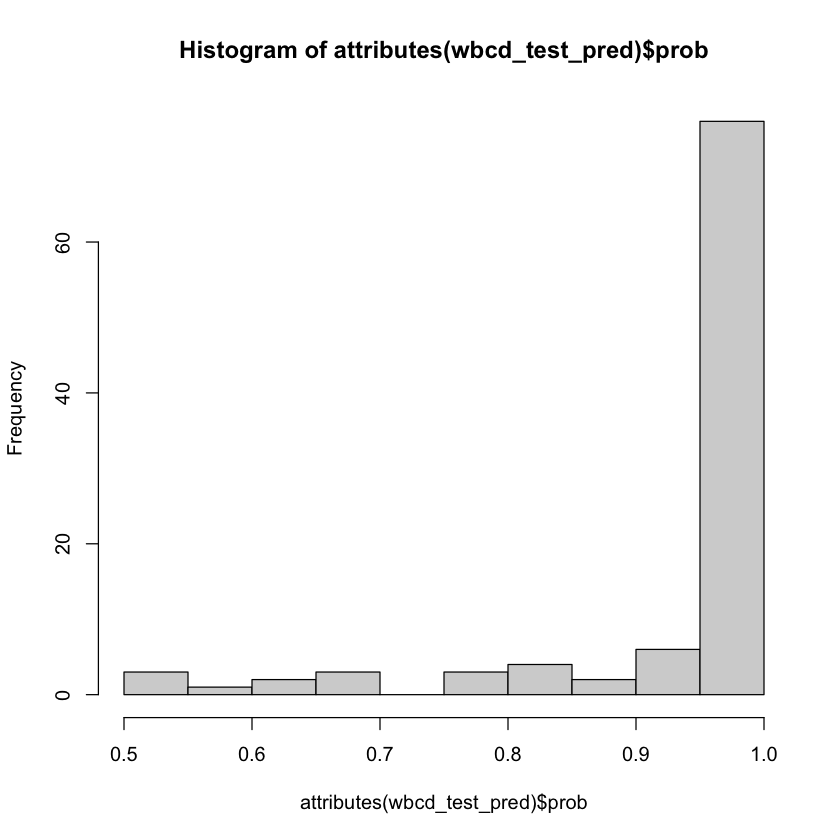

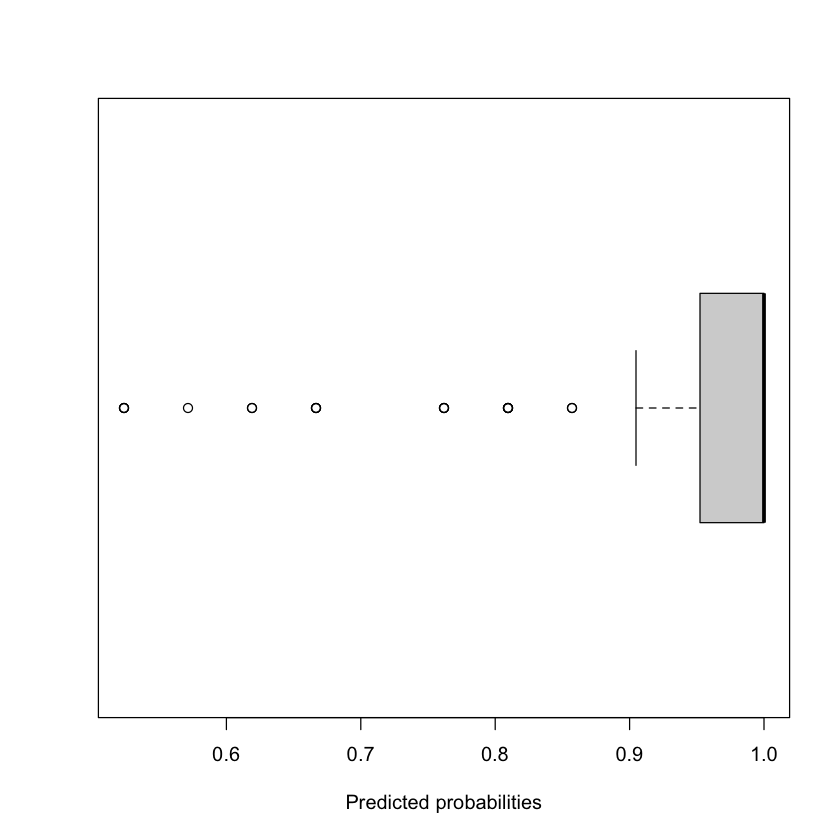

In [21]:
# Generate the list of predictions for the test set
wbcd_test_pred <- knn(train = wbcd_train, test = wbcd_test, cl = wbcd_train_labels, k = 21, prob = TRUE)

# Quick check what the model predicted
summary(wbcd_test_pred)

# Since we also added `prob = TRUE` inside `knn(...)`, we could also type `attributes(wbcd_test_pred)$prob` to see the resulting probabilities,
# or plot a histogram or a boxplot
attributes(wbcd_test_pred)$prob
hist(attributes(wbcd_test_pred)$prob)
boxplot(attributes(wbcd_test_pred)$prob, xlab = "Predicted probabilities", horizontal = TRUE)

In [22]:
library(gmodels)

In [26]:
CrossTable(x = wbcd_test_labels, y = wbcd_test_pred, dnn = c("Actual", "Predictions"), prop.chisq = FALSE, prop.c = FALSE, prop.r = FALSE, prop.t = FALSE)


 
   Cell Contents
|-------------------------|
|                       N |
|-------------------------|

 
Total Observations in Table:  100 

 
             | Predictions 
      Actual |    Benign | Malignant | Row Total | 
-------------|-----------|-----------|-----------|
      Benign |        61 |         0 |        61 | 
-------------|-----------|-----------|-----------|
   Malignant |         2 |        37 |        39 | 
-------------|-----------|-----------|-----------|
Column Total |        63 |        37 |       100 | 
-------------|-----------|-----------|-----------|

 
